# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        break

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 1 total reviews
Scraping page 2
   ---> 2 total reviews
Scraping page 3
   ---> 3 total reviews
Scraping page 4
   ---> 4 total reviews
Scraping page 5
   ---> 5 total reviews
Scraping page 6
   ---> 6 total reviews
Scraping page 7
   ---> 7 total reviews
Scraping page 8
   ---> 8 total reviews
Scraping page 9
   ---> 9 total reviews
Scraping page 10
   ---> 10 total reviews


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve page {i}")
        continue

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for review in parsed_content.find_all("article", {"itemprop": "review"}):
        review_data = {}

        # Extract date flown, aircraft, type of traveller, seat type, route, recommended
        review_stats = review.find("div", {"class": "review-stats"})
        if review_stats:
            for row in review_stats.find_all("tr"):
                header = row.find("td", {"class": "review-rating-header"}).get_text(strip=True)
                value = row.find("td", {"class": "review-value"})

                if value:
                    value = value.get_text(strip=True)
                else:
                    stars = row.find("td", {"class": "review-rating-stars"})
                    if stars:
                        value = len(stars.find_all("span", {"class": "star fill"}))

                review_data[header] = value

        # Extract review ratings
        ratings = review.find("table", {"class": "review-ratings"})
        if ratings:
            for row in ratings.find_all("tr"):
                header = row.find("td", {"class": "review-rating-header"}).get_text(strip=True)
                stars = row.find("td", {"class": "review-rating-stars"})

                if stars:
                    value = len(stars.find_all("span", {"class": "star fill"}))
                else:
                    value = row.find("td", {"class": "review-value"}).get_text(strip=True)

                review_data[header] = value

        # Extract review text
        review_text = review.find("div", {"itemprop": "reviewBody"})
        if review_text:
            review_data["reviews"] = review_text.get_text(strip=True)

        reviews.append(review_data)

    print(f"   ---> {len(reviews)} total reviews")

# Convert reviews list to DataFrame
df = pd.DataFrame(reviews)

# Display the DataFrame
df.head()


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,reviews,Wifi & Connectivity
0,A320/A380,Couple Leisure,Business Class,Belfast to San Francisco via London,April 2024,5.0,5.0,3.0,3.0,5.0,4,yes,"✅Trip Verified| Four very pleasant, on time f...",NaN
1,NaN,Couple Leisure,Economy Class,London Heathrow to Keflavik,June 2024,2.0,3.0,1.0,NaN,3.0,2,no,Not Verified| We travel extensively over 25 ...,NaN
2,Boeing 777,Solo Leisure,Business Class,New York JFK to London Heathrow,June 2024,5.0,5.0,4.0,3.0,1.0,2,yes,✅Trip Verified| Flight delayed an hour due to...,NaN
3,Boeing 777,Solo Leisure,Premium Economy,London to newark,June 2024,4.0,4.0,4.0,3.0,4.0,3,yes,✅Trip Verified| A very full flight made Premi...,NaN
4,NaN,Couple Leisure,Economy Class,Florence to Heathrow,June 2024,1.0,3.0,2.0,NaN,1.0,1,no,✅Trip Verified| The worst airline I’ve ever fl...,NaN


In [ ]:
# Split the "reviews" column into two columns based on '|'
df[['Verification', 'Suffix']] = df['reviews'].str.split('|', n=1, expand=True)

In [ ]:
#Verified or not
df['Verification'].value_counts()


Verification
✅Trip Verified    759
Not Verified      238
❎Not Verified       2
cNot Verified       1
Name: count, dtype: int64

In [ ]:

# Display the DataFrame with the new columns
# Check if the "Prefix" column contains the "✅" symbol and encode it as 1 or 0
df['Verification'] = df['Verification'].str.contains('✅Trip Verified').astype(int)

df.drop(columns=['reviews'], inplace=True)

df.rename(columns={'Suffix': 'reviews'}, inplace=True)

df.head()






,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Verification,reviews
0,A320/A380,Couple Leisure,Business Class,Belfast to San Francisco via London,April 2024,5.0,5.0,3.0,3.0,5.0,4,yes,NaN,1,"Four very pleasant, on time flights with fri..."
1,NaN,Couple Leisure,Economy Class,London Heathrow to Keflavik,June 2024,2.0,3.0,1.0,NaN,3.0,2,no,NaN,0,We travel extensively over 25 years and ten...
2,Boeing 777,Solo Leisure,Business Class,New York JFK to London Heathrow,June 2024,5.0,5.0,4.0,3.0,1.0,2,yes,NaN,1,Flight delayed an hour due to bad weather ar...
3,Boeing 777,Solo Leisure,Premium Economy,London to newark,June 2024,4.0,4.0,4.0,3.0,4.0,3,yes,NaN,1,A very full flight made Premium Economy feel...
4,NaN,Couple Leisure,Economy Class,Florence to Heathrow,June 2024,1.0,3.0,2.0,NaN,1.0,1,no,NaN,1,The worst airline I’ve ever flown. Could not ...


In [ ]:
df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,Verification
count,912.000000,904.000000,782.000000,521.000000,943.000000,1000.000000,313.000000,1000.000000
mean,2.729167,3.151549,2.659847,2.800384,2.550371,2.366000,2.175719,0.759000
std,1.378884,1.517793,1.476022,1.460532,1.542518,1.472485,1.497151,0.427904
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


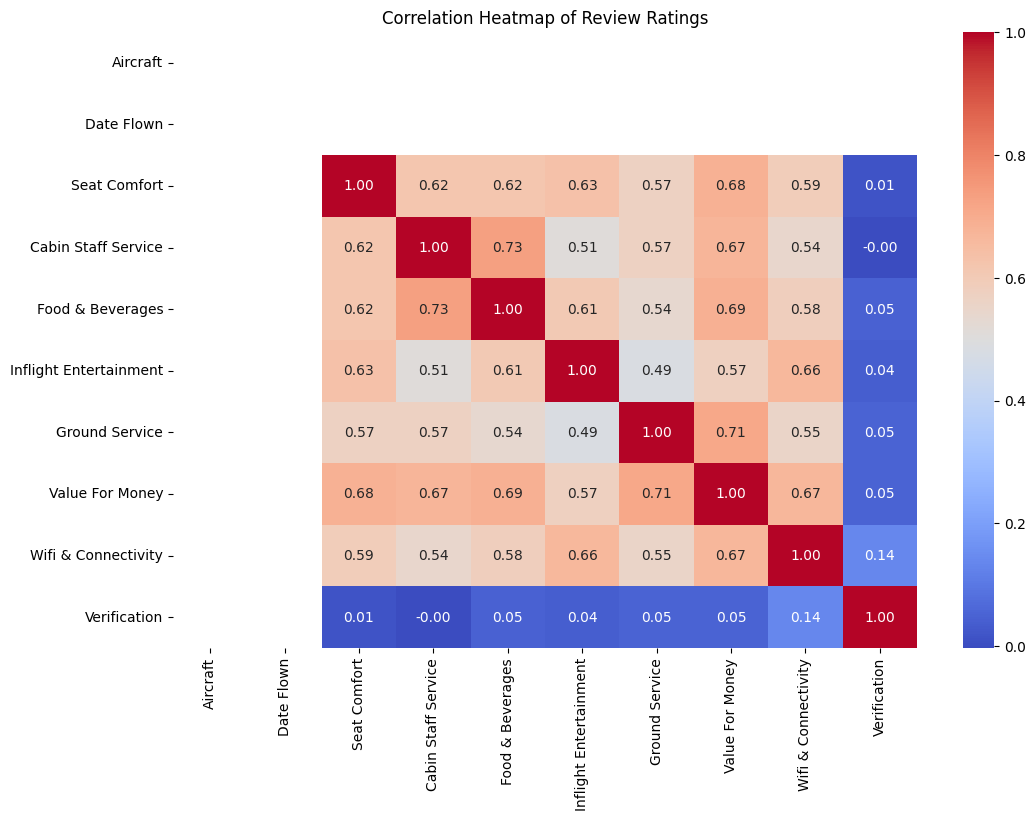

In [ ]:
# Drop any non-numeric columns
numeric_df = df.drop(columns=["reviews", "Type Of Traveller", "Seat Type", "Route", "Recommended"])

# Convert values to numeric
numeric_df = numeric_df.apply(pd.to_numeric, errors="coerce")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Review Ratings")
plt.show()

#Removing unwanted text(first text preprocessing)


In [ ]:
import re

def clean(text):
    # Remove '✅ Trip Verified |' if present
    text = text.replace('✅ Trip Verified |', '')
    # Remove special characters and numericals, leaving only alphabets
    text = re.sub(r'[^A-Za-z\s]+', '', str(text))
    return text

# Cleaning the text in the 'reviews' column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Verification,reviews,Cleaned Reviews
0,A320/A380,Couple Leisure,Business Class,Belfast to San Francisco via London,April 2024,5.0,5.0,3.0,3.0,5.0,4,yes,NaN,1,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frie...
1,NaN,Couple Leisure,Economy Class,London Heathrow to Keflavik,June 2024,2.0,3.0,1.0,NaN,3.0,2,no,NaN,0,We travel extensively over 25 years and ten...,We travel extensively over years and tend ...
2,Boeing 777,Solo Leisure,Business Class,New York JFK to London Heathrow,June 2024,5.0,5.0,4.0,3.0,1.0,2,yes,NaN,1,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather ar...
3,Boeing 777,Solo Leisure,Premium Economy,London to newark,June 2024,4.0,4.0,4.0,3.0,4.0,3,yes,NaN,1,A very full flight made Premium Economy feel...,A very full flight made Premium Economy feel...
4,NaN,Couple Leisure,Economy Class,Florence to Heathrow,June 2024,1.0,3.0,2.0,NaN,1.0,1,no,NaN,1,The worst airline I’ve ever flown. Could not ...,The worst airline Ive ever flown Could not ch...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
example=df['reviews'][50]
print(example)

  Absolutely horrible customer service - will never fly again. We left Toronto for London, and then missed our connecting flight from London to Mumbai,  so we had to book with a different airline and pay the costs. They then cancelled our return flight (3 weeks later) from Mumbai to Toronto without notifying us. We just happened to find out when we tried to check in on the day of. We are now stuck in Mumbai with 3 small kids, no return flights.  First and last time flying with them.


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Absolutely',
 'horrible',
 'customer',
 'service',
 '-',
 'will',
 'never',
 'fly',
 'again',
 '.']

In [ ]:
#pos_tag- Part of speach tagging
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Absolutely', 'RB'),
 ('horrible', 'JJ'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('-', ':'),
 ('will', 'MD'),
 ('never', 'RB'),
 ('fly', 'VB'),
 ('again', 'RB'),
 ('.', '.')]

In [ ]:
nltk.download('words')
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Absolutely/RB
  horrible/JJ
  customer/NN
  service/NN
  -/:
  will/MD
  never/RB
  fly/VB
  again/RB
  ./.
  We/PRP
  left/VBD
  (ORGANIZATION Toronto/NNP)
  for/IN
  (GPE London/NNP)
  ,/,
  and/CC
  then/RB
  missed/VBD
  our/PRP$
  connecting/VBG
  flight/NN
  from/IN
  (GPE London/NNP)
  to/TO
  (GPE Mumbai/NNP)
  ,/,
  so/IN
  we/PRP
  had/VBD
  to/TO
  book/NN
  with/IN
  a/DT
  different/JJ
  airline/NN
  and/CC
  pay/VB
  the/DT
  costs/NNS
  ./.
  They/PRP
  then/RB
  cancelled/VBD
  our/PRP$
  return/NN
  flight/NN
  (/(
  3/CD
  weeks/NNS
  later/RB
  )/)
  from/IN
  (GPE Mumbai/NNP)
  to/TO
  (GPE Toronto/NNP)
  without/IN
  notifying/VBG
  us/PRP
  ./.
  We/PRP
  just/RB
  happened/VBD
  to/TO
  find/VB
  out/RP
  when/WRB
  we/PRP
  tried/VBD
  to/TO
  check/VB
  in/IN
  on/IN
  the/DT
  day/NN
  of/IN
  ./.
  We/PRP
  are/VBP
  now/RB
  stuck/VBN
  in/IN
  (GPE Mumbai/NNP)
  with/IN
  3/CD
  small/JJ
  kids/NNS
  ,/,
  no/DT
  return/NN
  flights/NNS
  ./.
  First/

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
##VADER(Valence Aware Dictionary and Sentiment Reasoner)

## 1. VADER Sentiment Scoring
#We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text:
# This uses a "bag of words" approach:
# 1. Stop words are removed
# 2. each word is scored and combined to a total score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm #progressbar

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sia.polarity_scores(example)

{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.8908}

In [ ]:
# Run the polarity on the entire dataset
res={}

for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['reviews']
    res[i]=sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
df=df.reset_index().rename(columns={'index':'Id'})
df

,Id,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Verification,reviews,Cleaned Reviews
0,0,A320/A380,Couple Leisure,Business Class,Belfast to San Francisco via London,April 2024,5.0,5.0,3.0,3.0,5.0,4,yes,NaN,1,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frie...
1,1,NaN,Couple Leisure,Economy Class,London Heathrow to Keflavik,June 2024,2.0,3.0,1.0,NaN,3.0,2,no,NaN,0,We travel extensively over 25 years and ten...,We travel extensively over years and tend ...
2,2,Boeing 777,Solo Leisure,Business Class,New York JFK to London Heathrow,June 2024,5.0,5.0,4.0,3.0,1.0,2,yes,NaN,1,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather ar...
3,3,Boeing 777,Solo Leisure,Premium Economy,London to newark,June 2024,4.0,4.0,4.0,3.0,4.0,3,yes,NaN,1,A very full flight made Premium Economy feel...,A very full flight made Premium Economy feel...
4,4,NaN,Couple Leisure,Economy Class,Florence to Heathrow,June 2024,1.0,3.0,2.0,NaN,1.0,1,no,NaN,1,The worst airline I’ve ever flown. Could not ...,The worst airline Ive ever flown Could not ch...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,NaN,Solo Leisure,Business Class,Heathrow to Singapore,May 2019,3.0,3.0,2.0,4.0,3.0,3,no,NaN,1,I was seated right next to the galley and lav...,I was seated right next to the galley and lav...
996,996,NaN,Business,Economy Class,Lyon to London,May 2019,4.0,3.0,2.0,NaN,1.0,3,no,NaN,1,"Flight was OK, minor delay didn't both me. W...",Flight was OK minor delay didnt both me What...
997,997,Boeing 777-200,Couple Leisure,Economy Class,Gatwick to Barbados,May 2019,3.0,1.0,2.0,4.0,3.0,3,no,NaN,1,\r\nGatwick to Barbados return. I normally t...,\r\nGatwick to Barbados return I normally tr...
998,998,NaN,Couple Leisure,Economy Class,Marseille to London,May 2019,3.0,1.0,3.0,NaN,1.0,2,no,NaN,1,Marseille to London. I am generally annoyed ...,Marseille to London I am generally annoyed w...


In [ ]:
vaders=pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,...,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Verification,reviews,Cleaned Reviews
0,0,0.130,0.686,0.184,0.6801,A320/A380,Couple Leisure,Business Class,Belfast to San Francisco via London,April 2024,...,5.0,3.0,3.0,5.0,4,yes,NaN,1,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frie...
1,1,0.078,0.869,0.053,-0.9389,NaN,Couple Leisure,Economy Class,London Heathrow to Keflavik,June 2024,...,3.0,1.0,NaN,3.0,2,no,NaN,0,We travel extensively over 25 years and ten...,We travel extensively over years and tend ...
2,2,0.072,0.797,0.131,0.9620,Boeing 777,Solo Leisure,Business Class,New York JFK to London Heathrow,June 2024,...,5.0,4.0,3.0,1.0,2,yes,NaN,1,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather ar...
3,3,0.089,0.718,0.193,0.8481,Boeing 777,Solo Leisure,Premium Economy,London to newark,June 2024,...,4.0,4.0,3.0,4.0,3,yes,NaN,1,A very full flight made Premium Economy feel...,A very full flight made Premium Economy feel...
4,4,0.093,0.858,0.049,-0.9368,NaN,Couple Leisure,Economy Class,Florence to Heathrow,June 2024,...,3.0,2.0,NaN,1.0,1,no,NaN,1,The worst airline I’ve ever flown. Could not ...,The worst airline Ive ever flown Could not ch...


In [ ]:
Sentiment={}

In [ ]:

def vaderclass(compound,i):
    if (compound>0.6):
        p='Positive'
        return p
    elif(compound<=0.2 and compound>-0.2):
        p='Neutral'
        return p
    else:
        p='Negative'
        return p

for i,row in tqdm(vaders.iterrows(),total=len(vaders)):
    com=vaders['compound'][i]
    s=vaderclass(com,i)
    Sentiment[i]=s


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
vaders['Sentiment'] = vaders.index.map(Sentiment)

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,...,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Verification,reviews,Cleaned Reviews,Sentiment
0,0,0.130,0.686,0.184,0.6801,A320/A380,Couple Leisure,Business Class,Belfast to San Francisco via London,April 2024,...,3.0,3.0,5.0,4,yes,NaN,1,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frie...,Positive
1,1,0.078,0.869,0.053,-0.9389,NaN,Couple Leisure,Economy Class,London Heathrow to Keflavik,June 2024,...,1.0,NaN,3.0,2,no,NaN,0,We travel extensively over 25 years and ten...,We travel extensively over years and tend ...,Negative
2,2,0.072,0.797,0.131,0.9620,Boeing 777,Solo Leisure,Business Class,New York JFK to London Heathrow,June 2024,...,4.0,3.0,1.0,2,yes,NaN,1,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather ar...,Positive
3,3,0.089,0.718,0.193,0.8481,Boeing 777,Solo Leisure,Premium Economy,London to newark,June 2024,...,4.0,3.0,4.0,3,yes,NaN,1,A very full flight made Premium Economy feel...,A very full flight made Premium Economy feel...,Positive
4,4,0.093,0.858,0.049,-0.9368,NaN,Couple Leisure,Economy Class,Florence to Heathrow,June 2024,...,2.0,NaN,1.0,1,no,NaN,1,The worst airline I’ve ever flown. Could not ...,The worst airline Ive ever flown Could not ch...,Negative


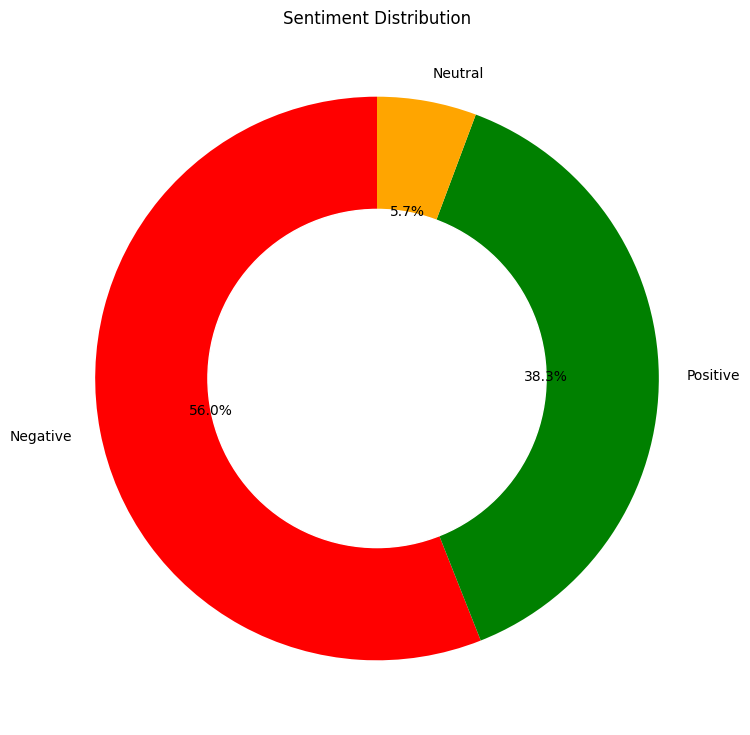

In [ ]:
# Calculate the counts of each sentiment category
sentiment_counts = vaders['Sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 9))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'orange'])
plt.title('Sentiment Distribution')
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))  # Adding a white circle to create the donut chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#Removing stop words from the list.


# Define the text
text = "This is a sample text, showing off the stop words filtration."

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Tokenize the text
word_tokens = word_tokenize(text)

# Remove stop words
filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

# Join the filtered words back into a single string
filtered_sentence = ' '.join(filtered_text)

print(filtered_sentence)


sample text , showing stop words filtration .


In [ ]:
text=df['reviews'][0]
text

'  Four very pleasant, on time flights with friendly, helpful staff. The guy on the LHR/SFO leg was exceptional and I regret that I have forgotten his name. Only negative was the food on the SFO/LHR leg. The advertised filet steak was more akin to stewing steak and was inedible. Sadly this is not the only occasion I have food on US/UK flights to be sub standard. Otherwise happy to recommend BA.'

In [ ]:
word_tokens = word_tokenize(text)
# Remove stop words
filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

# Join the filtered words back into a single string
filtered_sentence = ' '.join(filtered_text)

print(filtered_sentence)

Four pleasant , time flights friendly , helpful staff . guy LHR/SFO leg exceptional regret forgotten name . negative food SFO/LHR leg . advertised filet steak akin stewing steak inedible . Sadly occasion food US/UK flights sub standard . Otherwise happy recommend BA .


In [ ]:

# Define the function to remove stop words from a single text
def remove_stopwords(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)
    # Remove stop words
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    filtered_sentence = ' '.join(filtered_text)
    return filtered_sentence

# Apply the function to the 'reviews' column
vaders['Stopwords Removed'] = vaders['reviews'].apply(remove_stopwords)

In [ ]:
vaders

,Id,neg,neu,pos,compound,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,...,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Verification,reviews,Cleaned Reviews,Sentiment,Stopwords Removed
0,0,0.130,0.686,0.184,0.6801,A320/A380,Couple Leisure,Business Class,Belfast to San Francisco via London,April 2024,...,3.0,5.0,4,yes,NaN,1,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frie...,Positive,"Four pleasant , time flights friendly , helpfu..."
1,1,0.078,0.869,0.053,-0.9389,NaN,Couple Leisure,Economy Class,London Heathrow to Keflavik,June 2024,...,NaN,3.0,2,no,NaN,0,We travel extensively over 25 years and ten...,We travel extensively over years and tend ...,Negative,travel extensively 25 years tend use BA regula...
2,2,0.072,0.797,0.131,0.9620,Boeing 777,Solo Leisure,Business Class,New York JFK to London Heathrow,June 2024,...,3.0,1.0,2,yes,NaN,1,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather ar...,Positive,Flight delayed hour due bad weather around JFK...
3,3,0.089,0.718,0.193,0.8481,Boeing 777,Solo Leisure,Premium Economy,London to newark,June 2024,...,3.0,4.0,3,yes,NaN,1,A very full flight made Premium Economy feel...,A very full flight made Premium Economy feel...,Positive,full flight made Premium Economy feel little l...
4,4,0.093,0.858,0.049,-0.9368,NaN,Couple Leisure,Economy Class,Florence to Heathrow,June 2024,...,NaN,1.0,1,no,NaN,1,The worst airline I’ve ever flown. Could not ...,The worst airline Ive ever flown Could not ch...,Negative,worst airline ’ ever flown . Could check fligh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.077,0.815,0.109,0.8968,NaN,Solo Leisure,Business Class,Heathrow to Singapore,May 2019,...,4.0,3.0,3,no,NaN,1,I was seated right next to the galley and lav...,I was seated right next to the galley and lav...,Positive,seated right next galley lavatory aisle . safe...
996,996,0.066,0.816,0.119,0.5796,NaN,Business,Economy Class,Lyon to London,May 2019,...,NaN,1.0,3,no,NaN,1,"Flight was OK, minor delay didn't both me. W...",Flight was OK minor delay didnt both me What...,Negative,"Flight OK , minor delay n't . astonishing wait..."
997,997,0.076,0.846,0.079,0.2895,Boeing 777-200,Couple Leisure,Economy Class,Gatwick to Barbados,May 2019,...,4.0,3.0,3,no,NaN,1,\r\nGatwick to Barbados return. I normally t...,\r\nGatwick to Barbados return I normally tr...,Negative,Gatwick Barbados return . normally travel BA l...
998,998,0.119,0.784,0.096,-0.2973,NaN,Couple Leisure,Economy Class,Marseille to London,May 2019,...,NaN,1.0,2,no,NaN,1,Marseille to London. I am generally annoyed ...,Marseille to London I am generally annoyed w...,Negative,Marseille London . generally annoyed quality s...


In [ ]:
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud

# Ensure the necessary NLTK datasets are downloaded
nltk.download('stopwords')
nltk.download('punkt')
# Load the stop words correctly
stop_words = set(stopwords.words('english'))

In [ ]:
negative_df = vaders[vaders['Sentiment'] == 'Negative']
positive_df = vaders[vaders['Sentiment'] == 'Positive']
neutral_df = vaders[vaders['Sentiment'] == 'Neutral']

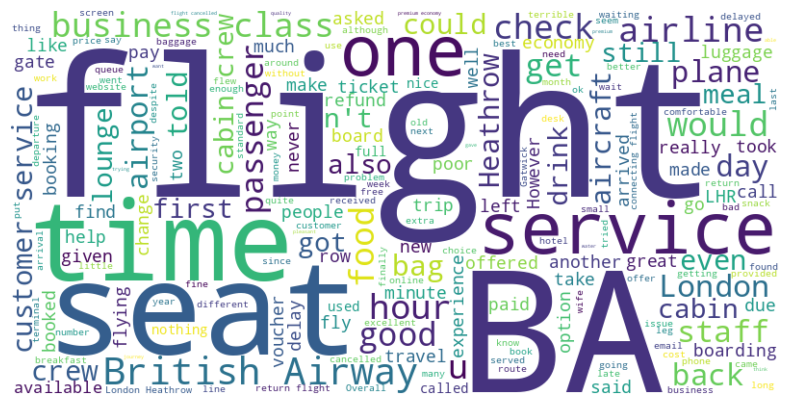

In [ ]:

# Define the function to remove stop words from a single text
def remove_stopwords(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)
    # Remove stop words
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    filtered_sentence = ' '.join(filtered_text)
    return filtered_sentence

# Apply the function to the 'reviews' column
vaders['Stopwords Removed'] = vaders['reviews'].apply(remove_stopwords)

# Combine all the cleaned reviews into a single string
all_reviews = ' '.join(vaders['Stopwords Removed'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words
).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show();

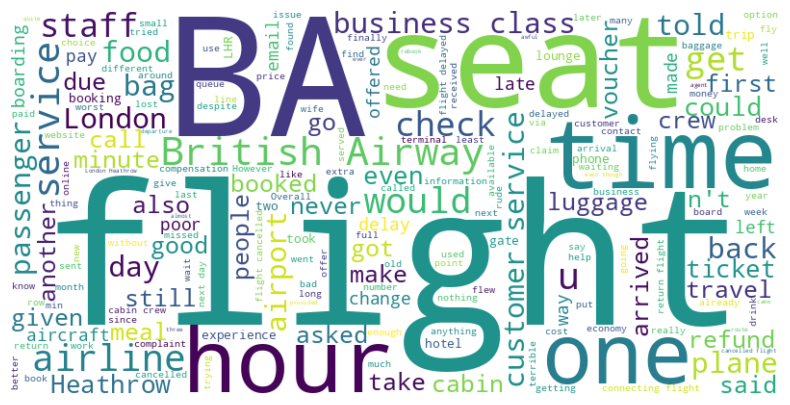

In [ ]:
# Apply the function to the 'reviews' column using .loc[]
negative_df.loc[:, 'Stopwords Removed'] = negative_df['reviews'].apply(remove_stopwords)

# Combine all the cleaned reviews into a single string
all_reviews = ' '.join(negative_df['Stopwords Removed'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words
).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show();


In [ ]:
vaders[['Date Flown','compound','Sentiment']]

,Date Flown,compound,Sentiment
0,April 2024,0.6801,Positive
1,June 2024,-0.9389,Negative
2,June 2024,0.9620,Positive
3,June 2024,0.8481,Positive
4,June 2024,-0.9368,Negative
...,...,...,...
995,May 2019,0.8968,Positive
996,May 2019,0.5796,Negative
997,May 2019,0.2895,Negative
998,May 2019,-0.2973,Negative


In [ ]:
# Group by 'Date Flown' and sum 'compound' scores
grouped_df = vaders.groupby('Date Flown')['compound'].sum().reset_index()

,Date Flown,compound
0,April 2019,0.2294
1,April 2020,-2.1104
2,April 2021,0.8086
3,April 2022,6.4891
4,April 2023,-7.5376
...,...,...
62,September 2019,6.5422
63,September 2020,1.5309
64,September 2021,-1.3760
65,September 2022,3.1259


In [ ]:
# Assuming grouped_df is your DataFrame
grouped_df['Date Flown'] = pd.to_datetime(grouped_df['Date Flown'])

# Sort the DataFrame by 'Date Flown'
grouped_df.sort_values(by='Date Flown', inplace=True)

grouped_df

   Date Flown  compound
61 2018-09-01   -0.7553
55 2018-10-01    0.9598
49 2018-11-01    0.9912
22 2019-01-01    0.9337
16 2019-02-01   -0.1869
..        ...       ...
21 2024-02-01    0.2756
42 2024-03-01    2.8601
5  2024-04-01   -5.3887
48 2024-05-01   -0.9640
38 2024-06-01    1.8352

[67 rows x 2 columns]


<ipython-input-195-2ad5d36b0233>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grouped_df['Date Flown'] = pd.to_datetime(grouped_df['Date Flown'])


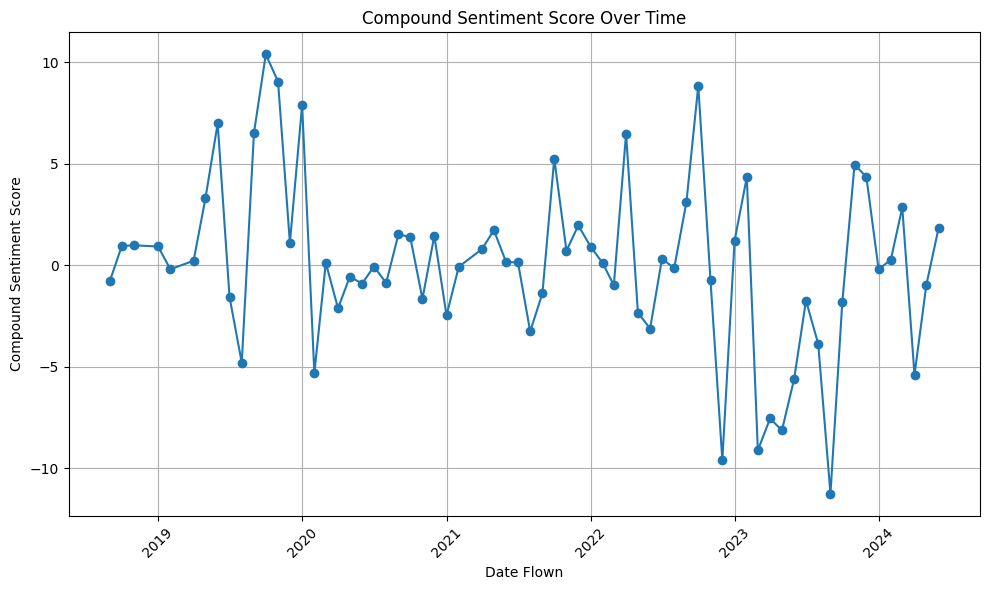

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Date Flown'], grouped_df['compound'], marker='o', linestyle='-')
plt.title('Compound Sentiment Score Over Time')
plt.xlabel('Date Flown')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

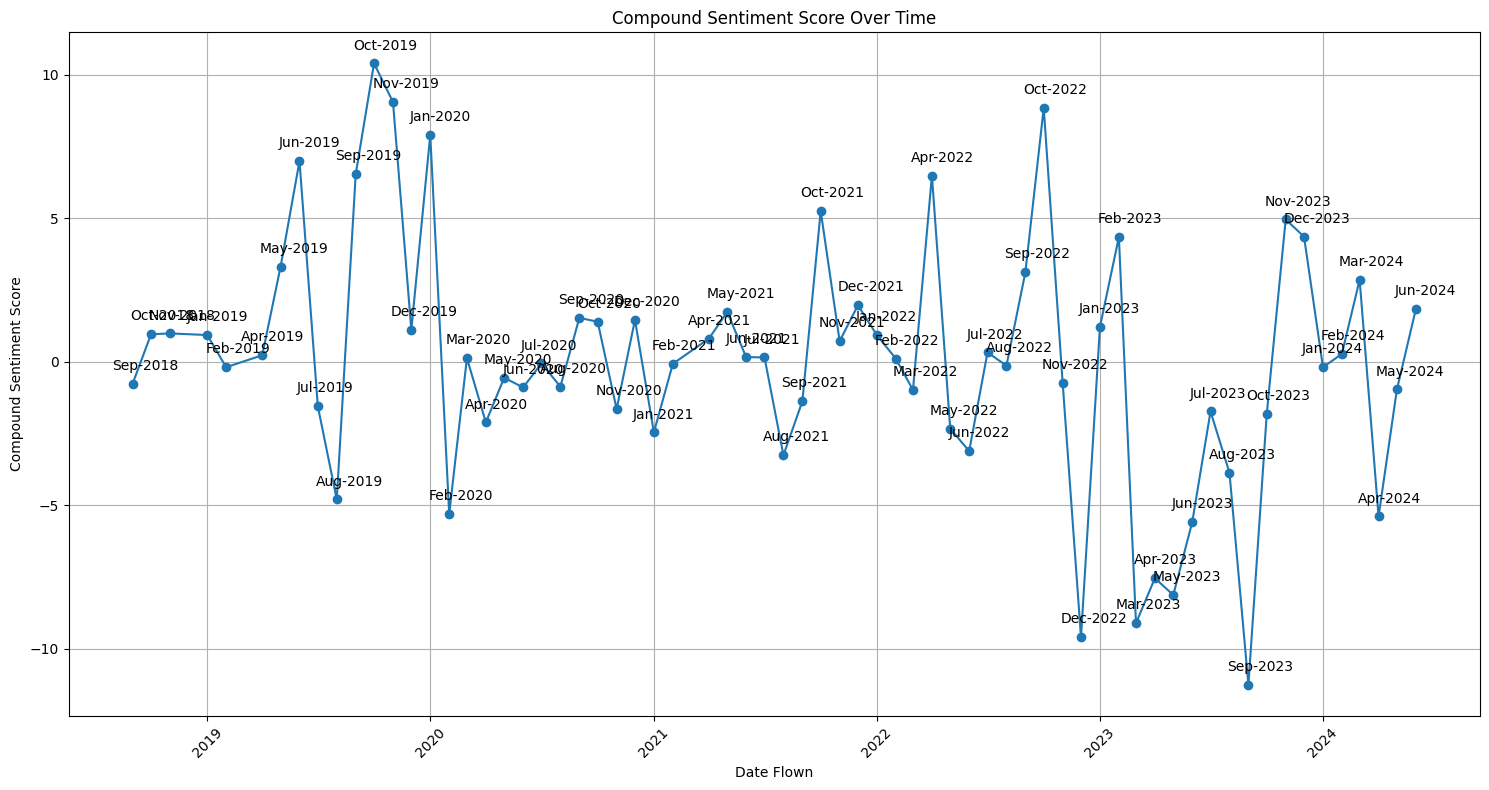

In [ ]:
# prompt: # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_df['Date Flown'], grouped_df['compound'], marker='o', linestyle='-')
# plt.title('Compound Sentiment Score Over Time')
# plt.xlabel('Date Flown')
# plt.ylabel('Compound Sentiment Score')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# I want the months and year also to be shown

import matplotlib.pyplot as plt
import pandas as pd

# Assuming grouped_df is your DataFrame
grouped_df['Date Flown'] = pd.to_datetime(grouped_df['Date Flown'])

# Sort the DataFrame by 'Date Flown'
grouped_df.sort_values(by='Date Flown', inplace=True)

# Extract month and year
grouped_df['Month'] = grouped_df['Date Flown'].dt.strftime('%b')
grouped_df['Year'] = grouped_df['Date Flown'].dt.strftime('%Y')

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(grouped_df['Date Flown'], grouped_df['compound'], marker='o', linestyle='-')
plt.title('Compound Sentiment Score Over Time')
plt.xlabel('Date Flown')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Add month and year labels
for i, row in grouped_df.iterrows():
    plt.annotate(f'{row["Month"]}-{row["Year"]}', xy=(row['Date Flown'], row['compound']), xytext=(-15, 10), textcoords="offset points")

plt.show()


In [ ]:
#